# Zero-shot object detection

Object-detection models such as [YOLO](https://pjreddie.com/darknet/yolo/) enable self-driving cars to "see" objects in front of them. Most public object-detection models are trained on datasets such as [COCO](https://cocodataset.org/) and [ImageNet](https://www.image-net.org/) that allow them to detect common objects ranging from people and bicycles to traffic lights and fire hydrants. Detecting other objects such as sea turtles and guitars, however, has traditionally required training a custom object-detection model.

Zero-shot object detection builds on zero-shot image classification by using [Contrastive Language-Image Pretraining](https://openai.com/research/clip) (CLIP) models to detect objects of virtually any type. The [OWLv2](https://huggingface.co/docs/transformers/en/model_doc/owlv2) model available from Hugging Face is a state-of-the-art model that uses self-training to expand the vocabulary of [OWL-ViT](https://huggingface.co/docs/transformers/en/model_doc/owlvit). It uses CLIP as its multi-modal backbone, with a visual transformer to get visual features and a causal language model to get text features.

Let's take `OWLv2` for a test drive. Begin by loading the model:

In [1]:
from transformers import pipeline

model = pipeline(
    model='google/owlv2-base-patch16-ensemble',
    task='zero-shot-object-detection'
)

Load an image of blue-and-gold macaws in the jungle:

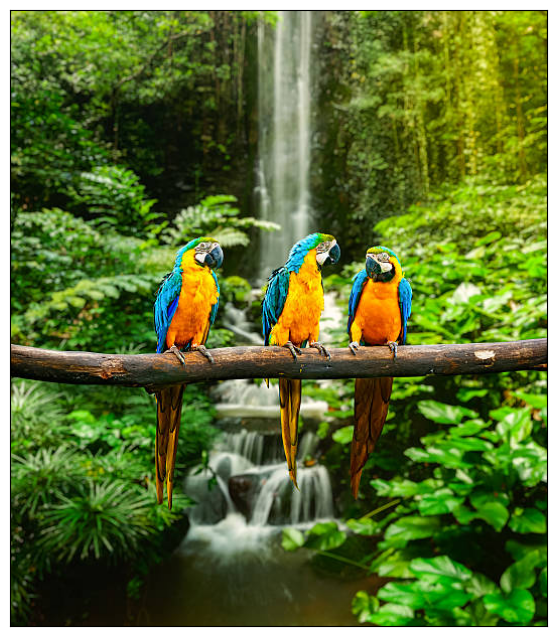

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('Data/macaws.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

Use `owlv2-base-patch16-ensemble` to detect any parrots or turtles in the photo:

In [3]:
candidate_labels = ['parrot', 'turtle']
predictions = model(image, candidate_labels)

Define a function for annotating images with bounding boxes and labels:

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def annotate_image(image, predictions, min_score=0.5, figsize=(12, 8)):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw={'xticks': [], 'yticks': []})
    ax.imshow(image)

    w, h = image.size
    ratio = w / h
    
    for prediction in predictions:
        score = prediction['score']
        
        if (score >= min_score):
            label = prediction['label']
            box = prediction['box']
            x1, y1, x2, y2 = box['xmin'], box['ymin'], box['xmax'], box['ymax']
            
            # Adjust box coordinates to account for padding if the image isn't square
            if w > h:
                y1 *= ratio
                y2 *= ratio
            elif w < h:
                x1 /= ratio
                x2 /= ratio
            
            width, height = x2 - x1, y2 - y1
            rect = Rectangle((x1, y1), width, height, fill=False, color='red', lw=2)
            ax.add_patch(rect)
            text = f'{label} ({score:.0%})'

            ax.text(x1 + (width / 2), y1, text, color='white', backgroundcolor='red',
                    ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))  

Annotate the parrot photo:

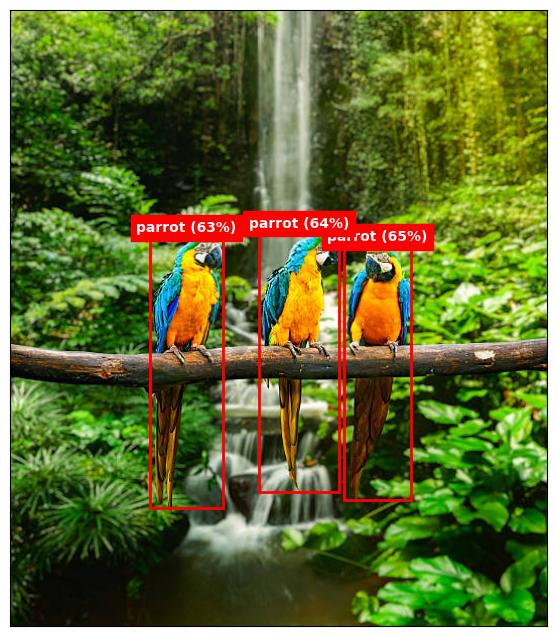

In [5]:
annotate_image(image, predictions)